this is a monoclinic system
the reciprocal vector are:
b1= [1.09463159 0.         0.        ]
b2= [ 0.          1.60081154 -0.63930687]
b3= [0.         0.         0.46138265]


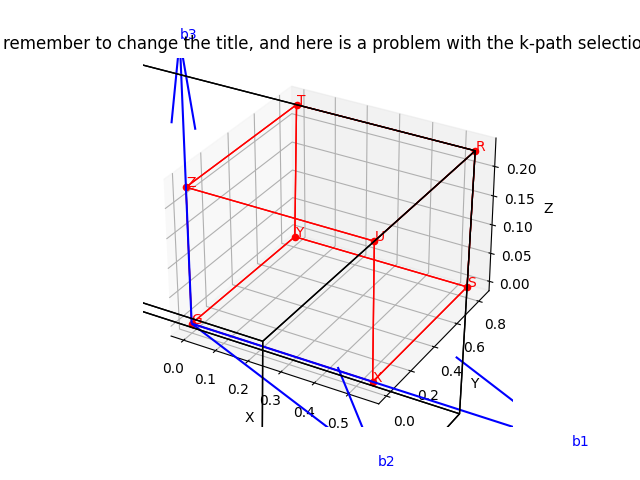

In [9]:
#计算仅针对单纯格子P，单斜m：仅需考虑截面形状  三斜：4种情况进行讨论，出现额外情况再进行讨论  直方/立方：太简单了

import os,sys,math,cmath
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
from collections import Counter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import string

a = 14.664
b = 5.74
c = 3.925
alpha = 90  
beta = 111.77
gamma = 90
#alpha = 91.13
#beta = 112.55
#gamma = 92.43

BP1=(0,0,0)
BP2=(0,0,0)
BP3=(0,0,0)
BP4=(0,0,0)
BP5=(0,0,0)
BP6=(0,0,0)
BP7=(0,0,0)
BP8=(0,0,0)
BP9=(0,0,0)
BP10=(0,0,0)
BP11=(0,0,0)
BP12=(0,0,0)
G = (0,0,0)



if alpha == beta == gamma == 90 :
    print("this is an orthorhombic system")

    a1 = (a,0,0)
    a2 = (0,b,0)
    a3 = (0,0,c)

    b1 = 2 * np.pi * np.cross(a2, a3) / np.dot(a1, np.cross(a2, a3))
    b2 = 2 * np.pi * np.cross(a3, a1) / np.dot(a1, np.cross(a2, a3))
    b3 = 2 * np.pi * np.cross(a1, a2) / np.dot(a1, np.cross(a2, a3))

    RV = np.array([b1,b2,b3])
    x = RV[:,0]
    y = RV[:,1]
    z = RV[:,2]

    print("the reciprocal vector are:")
    print("b1=",b1)
    print("b2=",b2)
    print("b3=",b3)

    #black line FBZ 边界线
    A1 = 0.5 * (b1+b2-b3)
    A2 = 0.5 * (-b1+b2-b3)
    A3 = 0.5 * (-b1-b2-b3)
    A4 = 0.5 * (b1-b2-b3)
    B1 = 0.5 * (b1+b2+b3)
    B2 = 0.5 * (-b1+b2+b3)
    B3 = 0.5 * (-b1-b2+b3)
    B4 = 0.5 * (b1-b2+b3)
    point_FBZ = [A1,A2,A3,A4,B1,B2,B3,B4]
    vertices_FBZ = [[point_FBZ[0],point_FBZ[1],point_FBZ[2],point_FBZ[3]],
                [point_FBZ[4],point_FBZ[5],point_FBZ[6],point_FBZ[7]],
                [point_FBZ[0],point_FBZ[1],point_FBZ[5],point_FBZ[4]],
                [point_FBZ[1],point_FBZ[2],point_FBZ[6],point_FBZ[5]],
                [point_FBZ[2],point_FBZ[3],point_FBZ[7],point_FBZ[6]],
                [point_FBZ[3],point_FBZ[0],point_FBZ[4],point_FBZ[7]],]
    face_FBZ = Poly3DCollection(vertices_FBZ, edgecolors='black', linewidths=1, alpha=0)
    #red line  k-path     bule line b1 b2 b3
    X = 0.5*b1
    S = 0.5*(b1+b2)
    Y = 0.5*b2
    Z = 0.5*b3
    U = 0.5*(b1+b3)
    R = B1
    T = 0.5*(b2+b3)
    point_kpath = [G,X,S,Y,Z,U,R,T]
    letter=['G','X','S','Y','Z','U','R','T']
    vertices_kpath = [[point_kpath[0],point_kpath[1],point_kpath[2],point_kpath[3]],
                [point_kpath[4],point_kpath[5],point_kpath[6],point_kpath[7]],
                [point_kpath[0],point_kpath[1],point_kpath[5],point_kpath[4]],
                [point_kpath[1],point_kpath[2],point_kpath[6],point_kpath[5]],
                [point_kpath[2],point_kpath[3],point_kpath[7],point_kpath[6]],
                [point_kpath[3],point_kpath[0],point_kpath[4],point_kpath[7]],]
    face_kpath = Poly3DCollection(vertices_kpath, edgecolors='red', linewidths=1, alpha=0)

    
    %matplotlib widget
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i, point in enumerate(point_kpath):
        ax.scatter(point[0], point[1], point[2], color='r')
        label = letter[i]
        ax.text(point[0], point[1], point[2], label, color='r')
    ax.set_title('oP lattice G-X-S-Y-G-Z-U-R-T-Z|Y-T|U-X|S-R')
    ax.add_collection3d(face_FBZ)
    ax.add_collection3d(face_kpath)
    ax.quiver(0, 0, 0, x, y, z, color='blue')
    ax.text(b1[0],b1[1],b1[2],'b1',color='blue')
    ax.text(b2[0],b2[1],b2[2],'b2',color='blue')
    ax.text(b3[0],b3[1],b3[2],'b3',color='blue')
    #ax.scatter(point_kpath)


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

elif (alpha == beta == 90) or (alpha == gamma ==90) or (beta == gamma ==90) :
    print("this is a monoclinic system")
    #ordering of the lattice a,b <= c, alpha<90, beta=gamma=90
    if alpha == 90 :
        if beta!=90 :
            alpha = beta
            beta=90
            A=b
            if c >= a :
                B = a
                C = c
            else:
                B = c
                C = a
        if gamma!=90 :
            alpha=gamma
            gamma=90
            A=c
            if b >= a :
                C = b
                B = a
            else:
                B = b
                C = a
    else :
        if b > c:
            A = a
            B = c
            C = b
        else:
            A = a
            B = b
            C = c
    if alpha>90:
        alpha=180-alpha
        coordinate_factor=-1
    else:
        coordinate_factor=1 #坐标修正系数，用于后续输出坐标时与原晶格参数对应，数值不一定是现在这样不变
    #这一变化的反向转换好像没那么简单，可以结合倒易向量的公式进行再一次的思考整理
    
    Alpha = np.radians(alpha)
    Beta = np.radians(beta)
    Gamma = np.radians(gamma)    

    a1=(A,0,0)
    a2=(0,B,0)
    a3=(0,C*np.cos(Alpha),C*np.sin(Alpha))

    b1 = 2 * np.pi * np.cross(a2, a3) / np.dot(a1, np.cross(a2, a3))
    b2 = 2 * np.pi * np.cross(a3, a1) / np.dot(a1, np.cross(a2, a3))
    b3 = 2 * np.pi * np.cross(a1, a2) / np.dot(a1, np.cross(a2, a3))

    RV = np.array([b1,b2,b3])
    x = RV[:,0]
    y = RV[:,1]
    z = RV[:,2]

    print("the reciprocal vector are:")
    print("b1=",b1)
    print("b2=",b2)
    print("b3=",b3)

    #加入判断条件， 由上述条件可得b2>b3，b2,b3的夹角大于90度
    #b2+b3与b3的夹角<90度时，为文献中的图像
    #大于90度时，为07的情况

    if np.dot(b2+b3,b3)>0: #文献对应 fig16

        n=(1-B*np.cos(Alpha)/C)/(2*np.sin(Alpha)**2)
        v=0.5-n*C*np.cos(Alpha)/B
        bp1=(-0.5,1-n,v)
        bp2=(-0.5,n,1-v)
        bp3=(-0.5,-n,v)
        bp4=(-0.5,n-1,-v)
        bp5=(-0.5,-n,v-1)
        bp6=(-0.5,n,-v)
        bp7=(0.5,1-n,v)
        bp8=(0.5,n,1-v)
        bp9=(0.5,-n,v)
        bp10=(0.5,n-1,-v)
        bp11=(0.5,-n,v-1)
        bp12=(0.5,n,-v)
        
        for i in range(0,12):
            exec("BP"+str(i+1)+"=bp"+str(i+1)+"[0]*b1+bp"+str(i+1)+"[1]*b2+bp"+str(i+1)+"[2]*b3")
        
        point_FBZ = [BP1,BP2,BP3,BP4,BP5,BP6,BP7,BP8,BP9,BP10,BP11,BP12]
        vertices_FBZ = [[point_FBZ[0],point_FBZ[1],point_FBZ[2],point_FBZ[3],point_FBZ[4],point_FBZ[5]],
                [point_FBZ[6],point_FBZ[7],point_FBZ[8],point_FBZ[9],point_FBZ[10],point_FBZ[11]],
                [point_FBZ[0],point_FBZ[1],point_FBZ[7],point_FBZ[6]],
                [point_FBZ[1],point_FBZ[2],point_FBZ[8],point_FBZ[7]],
                [point_FBZ[2],point_FBZ[3],point_FBZ[9],point_FBZ[8]],
                [point_FBZ[3],point_FBZ[4],point_FBZ[10],point_FBZ[9]],
                [point_FBZ[4],point_FBZ[5],point_FBZ[11],point_FBZ[10]],
                [point_FBZ[5],point_FBZ[0],point_FBZ[6],point_FBZ[11]]]
        face_FBZ = Poly3DCollection(vertices_FBZ, edgecolors='black', linewidths=1, alpha=0)

        a_k=(0.5,0.5,0)
        c_k=(0,0.5,0.5)
        d_k=(0.5,0,0.5)
        d1_k=(0.5,0,-0.5)
        e_k=(0.5,0.5,0.5)
        h_k=(0,n,1-v)
        h1_k=(0,1-n,v)
        h2_k=(0,n,-v)
        m_k=(0.5,n,1-v)
        m1_k=(0.5,1-n,v)
        m2_k=(0.5,n,-v)
        x_k=(0,0.5,0)
        y_k=(0,0,0.5)
        y1_k=(0,0,-0.5)
        z_k=(0.5,0,0)
        coordinate_kpath=[G,a_k,c_k,d_k,d1_k,e_k,h_k,h1_k,h2_k,m_k,m1_k,m2_k,x_k,y_k,y1_k,z_k]
        A_k=a_k[0]*b1+a_k[1]*b2+a_k[2]*b3
        C_k=c_k[0]*b1+c_k[1]*b2+c_k[2]*b3
        D_k=d_k[0]*b1+d_k[1]*b2+d_k[2]*b3
        D1_k=d1_k[0]*b1+d1_k[1]*b2+d1_k[2]*b3
        E_k=e_k[0]*b1+e_k[1]*b2+e_k[2]*b3
        H_k=h_k[0]*b1+h_k[1]*b2+h_k[2]*b3
        H1_k=h1_k[0]*b1+h1_k[1]*b2+h1_k[2]*b3
        H2_k=h2_k[0]*b1+h2_k[1]*b2+h2_k[2]*b3
        M_k=m_k[0]*b1+m_k[1]*b2+m_k[2]*b3
        M1_k=m1_k[0]*b1+m1_k[1]*b2+m1_k[2]*b3
        M2_k=m2_k[0]*b1+m2_k[1]*b2+m2_k[2]*b3
        X_k=x_k[0]*b1+x_k[1]*b2+x_k[2]*b3
        Y_k=y_k[0]*b1+y_k[1]*b2+y_k[2]*b3
        Y1_k=y1_k[0]*b1+y1_k[1]*b2+y1_k[2]*b3
        Z_k=z_k[0]*b1+z_k[1]*b2+z_k[2]*b3
        point_kpath=[G,A_k,C_k,D_k,D1_k,E_k,H_k,H1_k,H2_k,M_k,M1_k,M2_k,X_k,Y_k,Y1_k,Z_k]

        letter=['G','A','C','D','D1','E','H','H1','H2','M','M1','M2','X','Y','Y1','Z']

        point_kpath_route1=np.array([G,Y_k,H_k,C_k,E_k,M1_k,A_k,X_k,H1_k])
        point_kpath_route2=np.array([M_k,D_k,Z_k])
        point_kpath_route3=np.array([Y_k,D_k])
        x_route1=point_kpath_route1[:,0]
        y_route1=point_kpath_route1[:,1]
        z_route1=point_kpath_route1[:,2]
        x_route2=point_kpath_route2[:,0]
        y_route2=point_kpath_route2[:,1]
        z_route2=point_kpath_route2[:,2]
        x_route3=point_kpath_route3[:,0]
        y_route3=point_kpath_route3[:,1]
        z_route3=point_kpath_route3[:,2]

        %matplotlib widget
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        #k-path label
        for i, point in enumerate(point_kpath):
            ax.scatter(point[0], point[1], point[2], color='r')
            label = letter[i]
            ax.text(point[0], point[1], point[2], label, color='r')
        ax.set_title('MCL path:G-Y-H-C-E-M1-A-X-H1|M-D-Z|Y-D')
        #FBZ边界
        ax.add_collection3d(face_FBZ)
        #k-path
        ax.plot(x_route1,y_route1,z_route1,'ro-')
        ax.plot(x_route2,y_route2,z_route2,'ro-')
        ax.plot(x_route3,y_route3,z_route3,'ro-')
        #绘制逆向量
        ax.quiver(0, 0, 0, x, y, z, color='blue')
        ax.text(b1[0],b1[1],b1[2],'b1',color='blue')
        ax.text(b2[0],b2[1],b2[2],'b2',color='blue')
        ax.text(b3[0],b3[1],b3[2],'b3',color='blue')
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()
        
    else:
        I2=(1-B*np.cos(Alpha)/C)/(2*np.sin(Alpha)**2)
        I3=0.5+I2*C*np.cos(Alpha)/B
        H2=(1-3*B*np.cos(Alpha)/C+2*(B/C)**2)/(2*np.sin(Alpha)**2)
        H3=-0.5+H2*C*np.cos(Alpha)/B

        bp1=(-0.5,I2,I3)
        bp2=(-0.5,H2,H3)
        bp3=(-0.5,-I2,-I3)
        bp4=(-0.5,-H2,-H3)
        bp5=(0.5,I2,I3)
        bp6=(0.5,H2,H3)
        bp7=(0.5,-I2,-I3)
        bp8=(0.5,-H2,-H3)

        for i in range(0,8):
            exec("BP"+str(i+1)+"=bp"+str(i+1)+"[0]*b1+bp"+str(i+1)+"[1]*b2+bp"+str(i+1)+"[2]*b3")
        
        point_FBZ = [BP1,BP2,BP3,BP4,BP5,BP6,BP7,BP8]
        vertices_FBZ = [[point_FBZ[0],point_FBZ[1],point_FBZ[2],point_FBZ[3]],
                [point_FBZ[4],point_FBZ[5],point_FBZ[6],point_FBZ[7]],
                [point_FBZ[0],point_FBZ[1],point_FBZ[5],point_FBZ[4]],
                [point_FBZ[1],point_FBZ[2],point_FBZ[6],point_FBZ[5]],
                [point_FBZ[2],point_FBZ[3],point_FBZ[7],point_FBZ[6]],
                [point_FBZ[3],point_FBZ[0],point_FBZ[4],point_FBZ[7]]]
        face_FBZ = Poly3DCollection(vertices_FBZ, edgecolors='black', linewidths=1, alpha=0)

        z_k = (0,0,0.5)
        t_k = (0,I2,I3)
        y_k = (0,(I2+H2)/2,(I3+H3)/2)
        x_k = (0.5,0,0)
        u_k = (0.5,0,0.5)
        r_k = (0.5,I2,I3)
        s_k = (0.5,(I2+H2)/2,(I3+H3)/2)
        coordinate_kpath=[z_k,t_k,y_k,x_k,u_k,r_k,s_k]

        Z_k=z_k[0]*b1+z_k[1]*b2+z_k[2]*b3
        T_k=t_k[0]*b1+t_k[1]*b2+t_k[2]*b3
        Y_k=y_k[0]*b1+y_k[1]*b2+y_k[2]*b3
        X_k=x_k[0]*b1+x_k[1]*b2+x_k[2]*b3
        U_k=u_k[0]*b1+u_k[1]*b2+u_k[2]*b3
        R_k=r_k[0]*b1+r_k[1]*b2+r_k[2]*b3
        S_k=s_k[0]*b1+s_k[1]*b2+s_k[2]*b3
    
        point_kpath = [G,Z_k,T_k,Y_k,X_k,U_k,R_k,S_k]
        letter=['G','Z','T','Y','X','U','R','S']
        vertices_kpath = [[point_kpath[0],point_kpath[1],point_kpath[2],point_kpath[3]],
                          [point_kpath[4],point_kpath[5],point_kpath[6],point_kpath[7]],
                          [point_kpath[0],point_kpath[1],point_kpath[5],point_kpath[4]],
                          [point_kpath[1],point_kpath[2],point_kpath[6],point_kpath[5]],
                          [point_kpath[2],point_kpath[3],point_kpath[7],point_kpath[6]],
                          [point_kpath[3],point_kpath[0],point_kpath[4],point_kpath[7]]]
        face_kpath = Poly3DCollection(vertices_kpath, edgecolors='red', linewidths=1, alpha=0)

        %matplotlib widget
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        for i, point in enumerate(point_kpath):
            ax.scatter(point[0], point[1], point[2], color='r')
            label = letter[i]
            ax.text(point[0], point[1], point[2], label, color='r')
        ax.set_title('remember to change the title, and here is a problem with the k-path selection')
        ax.add_collection3d(face_FBZ)
        ax.add_collection3d(face_kpath)
        ax.quiver(0, 0, 0, x, y, z, color='blue')
        ax.text(b1[0],b1[1],b1[2],'b1',color='blue')
        ax.text(b2[0],b2[1],b2[2],'b2',color='blue')
        ax.text(b3[0],b3[1],b3[2],'b3',color='blue')
        #ax.scatter(point_kpath)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()

else :
    print("this is a triclinic system")
    
    Alpha = np.radians(alpha)
    Beta = np.radians(beta)
    Gamma = np.radians(gamma)

    a1 = (a,0,0)
    a2 = (b * np.cos(Gamma), b * np.sin(Gamma), 0)
    a3 = (c * np.cos(Beta), c * ( np.cos(Alpha) - np.cos(Beta) * np.cos(Gamma)) / np.sin(Gamma), np.sqrt(np.sin(Gamma)**2-np.cos(Alpha)**2-np.cos(Beta)**2+2*np.cos(Alpha)*np.cos(Beta)*np.cos(Gamma))*c/np.sin(Gamma))

    b1 = 2 * np.pi * np.cross(a2, a3) / np.dot(a1, np.cross(a2, a3))
    b2 = 2 * np.pi * np.cross(a3, a1) / np.dot(a1, np.cross(a2, a3))
    b3 = 2 * np.pi * np.cross(a1, a2) / np.dot(a1, np.cross(a2, a3))

    RV = np.array([b1,b2,b3])
    x = RV[:,0]
    y = RV[:,1]
    z = RV[:,2]

    print("the reciprocal vector are:")
    print("b1=",b1)
    print("b2=",b2)
    print("b3=",b3)

    cos_b1=np.dot(b2,b3)/(np.linalg.norm(b2)*np.linalg.norm(b3))
    cos_b2=np.dot(b3,b1)/(np.linalg.norm(b3)*np.linalg.norm(b1))
    cos_b3=np.dot(b1,b2)/(np.linalg.norm(b1)*np.linalg.norm(b2))
    #TRI1b case
    if np.dot(b2,b3)>0 and np.dot(b3,b1)>0 and np.dot(b1,b2)>0 :
        #顺序调整ky=max{ka,kb,ky}
        if cos_b3!=min(cos_b1,cos_b2,cos_b3):
            if cos_b1<cos_b2:
                B3=b1
                B1=b3
                B2=b2
            else:
                B3=b2
                B2=b3
                B1=b1
        else:
            B1=b1
            B2=b2
            B3=b3

        #k-path point table 21
        l_k=(0.5,-0.5,0)
        m_k=(0,0,0.5)
        n_k=(-0.5,-0.5,0.5)
        r_k=(0,-0.5,0.5)
        x_k=(0,-0.5,0)
        y_k=(0.5,0,0)
        z_k=(-0.5,0,0.5)
        coordinate_kpath=[G,l_k,m_k,n_k,r_k,x_k,y_k,z_k]

        L_k=l_k[0]*B1+l_k[1]*B2+l_k[2]*B3
        M_k=m_k[0]*B1+m_k[1]*B2+m_k[2]*B3
        N_k=n_k[0]*B1+n_k[1]*B2+n_k[2]*B3
        R_k=r_k[0]*B1+r_k[1]*B2+r_k[2]*B3
        X_k=x_k[0]*B1+x_k[1]*B2+x_k[2]*B3
        Y_k=y_k[0]*B1+y_k[1]*B2+y_k[2]*B3
        Z_k=z_k[0]*B1+z_k[1]*B2+z_k[2]*B3

        point_kpath=[G,L_k,M_k,N_k,R_k,X_k,Y_k,Z_k]

        letter=['G','L','M','N','R','X','Y','Z']

        point_kpath_route1=np.array([X_k,G,Y_k])
        point_kpath_route2=np.array([L_k,G,Z_k])
        point_kpath_route3=np.array([N_k,G,M_k])
        point_kpath_route4=np.array([R_k,G])
        x_route1=point_kpath_route1[:,0]
        y_route1=point_kpath_route1[:,1]
        z_route1=point_kpath_route1[:,2]
        x_route2=point_kpath_route2[:,0]
        y_route2=point_kpath_route2[:,1]
        z_route2=point_kpath_route2[:,2]
        x_route3=point_kpath_route3[:,0]
        y_route3=point_kpath_route3[:,1]
        z_route3=point_kpath_route3[:,2]
        x_route4=point_kpath_route3[:,0]
        y_route4=point_kpath_route3[:,1]
        z_route4=point_kpath_route3[:,2]

        #fbz边界点计算，非常麻烦，直接尝试用编程计算
        #定义计算交点的函数
        def interseaction_cal(p1,p2,p3):
            A=np.vstack((p1[:3],p2[:3],p3[:3]))
            B=np.array([np.dot(p1,p1),np.dot(p2,p2),np.dot(p3,p3)])
            interseaction=np.linalg.solve(A,B)
            return interseaction
        #Y面的顶点
        pYMx=interseaction_cal(Y_k,M_k,-X_k)
        pYnx=interseaction_cal(Y_k,-N_k,-X_k)
        pYnz=interseaction_cal(Y_k,-N_k,-Z_k)
        pYLz=interseaction_cal(Y_k,L_k,-Z_k)
        pYLR=interseaction_cal(Y_k,L_k,R_k)
        pYMR=interseaction_cal(Y_k,M_k,R_k)
        #y（小写字母代表对面）
        pymX=-pYMx
        pyNX=-pYnx
        pyNZ=-pYnz
        pylZ=-pYLz
        pylr=-pYLR
        pymr=-pYMR
        #x面
        pxMZ=interseaction_cal(-X_k,M_k,Z_k)
        pxlZ=interseaction_cal(-X_k,-L_k,Z_k)
        pxlr=interseaction_cal(-X_k,-L_k,-R_k)
        pxnr=interseaction_cal(-X_k,-N_k,-R_k)
        #pYMx,pYnx 注意顺序
        #X面
        pXmz=-pxMZ
        pXLz=-pxlZ
        pXLR=-pxlr
        pXNR=-pxnr  #pymX pyNX
        
        #M面
        pMZR=interseaction_cal(M_k,Z_k,R_k) #pxMZ pYMx pYMR

        #m
        pmzr=-pMZR  #pXmz pymX pymr

        #Z面
        pZRN=interseaction_cal(Z_k,R_k,N_k) #pMZR pxlZ pxMZ pylZ pyNZ

        #z
        pzrn=-pZRN #pmzr pXLz pXmz pYLz pYnz

        #R  pZRN pMZR pXNR pXLR pYLR pYMR
        #r  pzrn pmzr pxnr pxlr pylr pymr
        #L  pXLR pXLz pYLz pYLR
        #l  pxlr pxlZ pylZ pylr
        #N  pZRN pXNR pyNZ pyNX
        #n  pzrn pxnr pYnz pYnx

        vertices_FBZ=[[pYMx,pYnx,pYnz,pYLz,pYLR,pYMR],
                      [pymX,pyNX,pyNZ,pylZ,pylr,pymr],
                      [pxMZ,pxlZ,pxlr,pxnr,pYnx,pYMx],
                      [pXmz,pXLz,pXLR,pXNR,pyNX,pymX],
                      [pMZR,pxMZ,pYMx,pYMR],
                      [pmzr,pXmz,pymX,pymr],
                      [pZRN,pMZR,pxMZ,pxlZ,pylZ,pyNZ],
                      [pzrn,pmzr,pXmz,pXLz,pYLz,pYnz],
                      [pZRN,pMZR,pYMR,pYLR,pXLR,pXNR],
                      [pzrn,pmzr,pymr,pylr,pxlr,pxnr],
                      [pXLR,pXLz,pYLz,pYLR],
                      [pxlr,pxlZ,pylZ,pylr],
                      [pZRN,pXNR,pyNX,pyNZ],
                      [pzrn,pxnr,pYnx,pYnz]]

        face_FBZ = Poly3DCollection(vertices_FBZ, edgecolors='black', linewidths=1, alpha=0)

        %matplotlib widget
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        #k-path label
        for i, point in enumerate(point_kpath):
            ax.scatter(point[0], point[1], point[2], color='r')
            label = letter[i]
            ax.text(point[0], point[1], point[2], label, color='r')
        ax.set_title('TRI1b lattice. k-path:X-G-Y|L-G-Z|N-G-M|R-G')
        #FBZ边界
        ax.add_collection3d(face_FBZ)
        #k-path
        ax.plot(x_route1,y_route1,z_route1,'ro-')
        ax.plot(x_route2,y_route2,z_route2,'ro-')
        ax.plot(x_route3,y_route3,z_route3,'ro-')
        ax.plot(x_route4,y_route4,z_route4,'ro-')
        #绘制逆向量
        ax.quiver(0, 0, 0, x, y, z, color='blue')
        ax.text(B1[0],B1[1],B1[2],'b1',color='blue')
        ax.text(B2[0],B2[1],B2[2],'b2',color='blue')
        ax.text(B3[0],B3[1],B3[2],'b3',color='blue')
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()